# Lab Assignment 1


## Important notes

**Submission deadline:**
* **Regular problems: last lab session before Friday 16.10.2020**
* **Bonus problems: deadline for Lab Assignment 2**

**Points: 11 + 3 bonus points**

Please note: some of the assignments are tedious or boring if you are already a NumPy ninja. The bonus problems were designed to give you a more satisfying alternative.

The assignment is in the form of a Jupyter notebook. We will be using [Google Colab](https://colab.research.google.com) to solve it. Below you will find a "Setup" section. Follow instructions from this paragraph to download the notebook and open it using [Google Colab](https://colab.research.google.com). 

Your goal is to solve problems posted below. Whenever possible, add your solutions to the notebook.

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

## Setup

### 1. Open the notebook using Google Colab

1. From Github: Click on "View in Colaboratory", then save to your Google Drive.
2. Alternatively upload manually to Drive:
  1. Download the notebook or clone https://github.com/janchorowski/ml_uwr.
  2. Go to  [Google Colab](https://colab.research.google.com).
  3. Go to "UPLOAD" tab and select a local copy of the notebook that you downloaded in point 1.
  
Colab Tips:
1. Set tab width to 4 spaces under `Tools` → `Preferences`.
  
### 2. Open the notebook offline using Jupyter/IPython

This notebook can be opened using Jupyter notebook. Simply install a scientific Python distribution on your computer (e.g. [Anaconda](https://www.anaconda.com/) or [WinPython](http://winpython.github.io/)), clone the repository https://github.com/janchorowski/ml_uwr and run `jupyter notebook`.

###   3. Install required dependencies, download data and import packages

Run cells below. To run a cell either click it and click a run button or press "shift + enter"


In [29]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

In [30]:
# Standard IPython notebook imports
%matplotlib inline

import os

import httpimport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import scipy.stats as sstats

import seaborn as sns
from sklearn import datasets

# In this way we can import functions straight from github
with httpimport.github_repo('janchorowski', 'nn_assignments', 
                            module='common', branch='nn18'):
     from common.plotting import plot_mat

sns.set_style('whitegrid')

### 4. Follow the notebook and solve problems posted below

## Problems

### Problem 0 [0p]

 
1. To learn more about Jupyter,  read [Jupyter tutorial from Data Analysis in Biological Sciences course at Caltech](http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html) (which itself can be downloaded as a Jupyter notebook). Feel free to skip the tutorial if you have some prior experience with Jupyter notebook.
2. To learn more about basic Google Colab features, go to [Google Colab](https://colab.research.google.com) and select "Overview of Colaboratory Features" in "EXAMPLES" tab. To learn more about / set up useful keyboard shortcuts (e.g. to add a new cell without clicking ""+ code"), go to "Tools --> Keyboard shortcuts"

### Problem 1: NumPy [2p]

First, get familiar with Python at https://docs.python.org/3/tutorial/. Then, get
to know the capabilities of NumPy, the prime numerical library of Python http://www.numpy.org/, for instance with the tutorial at https://numpy.org/doc/stable/user/quickstart.html. Finally, look into Pandas at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html.

You might also need:
  1. another intro to NumPy,
http://people.duke.edu/~ccc14/pcfb/numerics.html
  2. a better interactive shell for Python
http://ipython.org/
  3. a plotting library for Python
http://matplotlib.org/
  4. nice statistical plots for matplotlib https://seaborn.pydata.org/.


**a) Declare variables:**
1. $a=10$,
2. $b=2.5\times 10^{23}$,
3. $c=2+3i$, where $i$ is an imaginary unit,
4. $d=e^{i2\pi/3}$, where $i$ is an imaginary unit, $e$ is the Euler's number (use `exp`, `pi`).

In [31]:
# TODO: Complete the declarations
a = 10
b = 2.5 * 1e23
c = 2 + 3j
d = np.exp((1j*2*np.pi)/3)
(a, b, c, d)

(10, 2.5e+23, (2+3j), (-0.4999999999999998+0.8660254037844387j))

**b) Declare vectors:**
1. $aVec=\begin{bmatrix} 3.14 & 15 & 9 & 26 \end{bmatrix}$,
2. $bVec=\begin{bmatrix} 5 & 4.8 & \cdots & -4.8 & -5 \end{bmatrix}$ (vector of numbers from $5$ to $-5$ decreasing by $0.2$),
3. $cVec=\begin{bmatrix} 10^0 & 10^{0.01} & \cdots & 10^{0.99} & 10^1 \end{bmatrix}$ (logarithmically spaced numbers from 1 to 10, use `logspace` and make sure, that the result has correct length!),
4. $dVec=Hello$ ($eVec$ is a string of characters, thus a vector).

In [32]:
aVec = np.array([3.14, 15, 9, 26])
bVec = np.arange(5, -5.2, -0.2)
cVec = np.logspace(0,1,100)
dVec = np.array(list('Hello'))
(aVec, bVec, cVec, dVec)

(array([ 3.14, 15.  ,  9.  , 26.  ]),
 array([ 5.0000000e+00,  4.8000000e+00,  4.6000000e+00,  4.4000000e+00,
         4.2000000e+00,  4.0000000e+00,  3.8000000e+00,  3.6000000e+00,
         3.4000000e+00,  3.2000000e+00,  3.0000000e+00,  2.8000000e+00,
         2.6000000e+00,  2.4000000e+00,  2.2000000e+00,  2.0000000e+00,
         1.8000000e+00,  1.6000000e+00,  1.4000000e+00,  1.2000000e+00,
         1.0000000e+00,  8.0000000e-01,  6.0000000e-01,  4.0000000e-01,
         2.0000000e-01, -4.4408921e-15, -2.0000000e-01, -4.0000000e-01,
        -6.0000000e-01, -8.0000000e-01, -1.0000000e+00, -1.2000000e+00,
        -1.4000000e+00, -1.6000000e+00, -1.8000000e+00, -2.0000000e+00,
        -2.2000000e+00, -2.4000000e+00, -2.6000000e+00, -2.8000000e+00,
        -3.0000000e+00, -3.2000000e+00, -3.4000000e+00, -3.6000000e+00,
        -3.8000000e+00, -4.0000000e+00, -4.2000000e+00, -4.4000000e+00,
        -4.6000000e+00, -4.8000000e+00, -5.0000000e+00]),
 array([ 1.        ,  1.02353102,  1.047

**c) Declare matrices:**
1. \begin{equation}aMat=\begin{bmatrix}
                    2      & \cdots & 2 \\
                    \vdots & \ddots & \vdots \\
                    2      & \cdots & 2
          \end{bmatrix},\end{equation}
    matrix $9\times 9$ filled with 2s (use `ones` or `zeros`),
2. \begin{equation}bMat=\begin{bmatrix}
                    1      & 0      & \cdots &        & 0      \\
                    0      & \ddots & 0      &        & 0      \\
                    \vdots & 0      & 5      & 0      & \vdots \\
                           &        & 0      & \ddots & 0      \\
                    0      &        & \cdots & 0      & 1
                \end{bmatrix},\end{equation}
    matrix $9\times 9$ filled with zeros, with
    $[ 1, 2, 3, 4, 5, 4, 3, 2, 1]$ on its diagonal (use `zeros`, `diag`),
3. \begin{equation}cMat=\begin{bmatrix}
                    1      & 11     & \cdots & 91     \\
                    2      & 12     & \cdots & 92     \\
                    \vdots & \vdots & \ddots & \vdots \\
                    10     & 20     & \cdots & 100
                \end{bmatrix},\end{equation}
    matrix $10\times 10$, columns of which form the vector $1:100$ (use `reshape`),
4. \begin{equation}dMat=\begin{bmatrix}
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN
                \end{bmatrix},\end{equation}
    matrix $3\times 4$ filled with `NaN`s (use... `NaN`),
5. \begin{equation}eMat=\begin{bmatrix}
                    13  & -1  & 5  \\
                    -22 & 10  & -87
                \end{bmatrix},\end{equation}
6. $fMat$ of shape $3\times 3$ filled with random natural numbers from $[-3,3]$ (use `rand` and `floor` or `ceil`).

In [33]:
aMat = np.full((9, 9), 2)
bMat = np.diag(np.concatenate((np.arange(1,6), np.arange(4,0,-1))))
cMat = np.arange(1,101).reshape((10, 10)).T
dMat = np.full((3, 4), np.NaN)
eMat = np.array([[13, -1, 5], [-22, 10, -87]])
fMat = np.floor(np.random.rand(3,3)*7.0)-3
print(aMat)
print(bMat)
print(cMat)
print(dMat)
print(eMat)
print(fMat)

[[2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]]
[[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1]]
[[  1  11  21  31  41  51  61  71  81  91]
 [  2  12  22  32  42  52  62  72  82  92]
 [  3  13  23  33  43  53  63  73  83  93]
 [  4  14  24  34  44  54  64  74  84  94]
 [  5  15  25  35  45  55  65  75  85  95]
 [  6  16  26  36  46  56  66  76  86  96]
 [  7  17  27  37  47  57  67  77  87  97]
 [  8  18  28  38  48  58  68  78  88  98]
 [  9  19  29  39  49  59  69  79  89  99]
 [ 10  20  30  40  50  60  70  80  90 100]]
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
[[ 13  -1   5]
 [-22  10 -87]]
[[ 3.  2. -1.]
 [-3.  3.  2.]
 [-2. -1. -3.]]


**d) Declare a multiplication table**
as a $10\times 10$ matrix `mulMat`. Use matrix/vector multiplication.

In [34]:
mulMat = np.arange(1, 11) * np.arange(1, 11).reshape(10, 1)
mulMat

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

**e) Compute element-wise using values from b).**

For instance, the first element of $xVec[0]$ should be equal to

\begin{equation}
1/(\sqrt{2\pi2.5^2}) e^{-cVec[0]^2 / (2\cdot\pi 2.5^2)}.
\end{equation}

1. $xVec=1/(\sqrt{2\pi2.5^2}) e^{-cVec^2 / (2\cdot\pi 2.5^2)}$
2. $yVec=\log_{10}(1/cVec)$, using `log10`

In [35]:
xVec = 1/(np.sqrt(2*np.pi*2.5*2.5)*np.exp(-cVec*cVec/(2*np.pi*2.5*2.5)))
yVec = np.log10(1/cVec)

xVec, yVec

(array([0.16369269, 0.16389129, 0.1640996 , 0.16431812, 0.16454736,
        0.16478786, 0.16504018, 0.16530493, 0.16558275, 0.16587429,
        0.16618027, 0.16650142, 0.16683853, 0.16719242, 0.16756397,
        0.1679541 , 0.16836377, 0.16879403, 0.16924595, 0.16972069,
        0.17021946, 0.17074355, 0.17129433, 0.17187324, 0.17248181,
        0.17312168, 0.17379455, 0.17450227, 0.17524679, 0.17603015,
        0.17685458, 0.1777224 , 0.17863612, 0.17959837, 0.18061201,
        0.18168005, 0.18280572, 0.18399247, 0.18524399, 0.18656424,
        0.18795744, 0.18942814, 0.19098122, 0.1926219 , 0.19435583,
        0.19618906, 0.19812813, 0.20018009, 0.20235256, 0.20465376,
        0.2070926 , 0.20967875, 0.21242269, 0.21533581, 0.21843049,
        0.22172025, 0.2252198 , 0.22894524, 0.23291418, 0.23714593,
        0.24166166, 0.24648467, 0.2516406 , 0.25715775, 0.26306738,
        0.26940412, 0.27620637, 0.2835168 , 0.29138293, 0.29985779,
        0.30900069, 0.31887808, 0.3295646 , 0.34

**f) Compute with matrix/vector operations.**

**NOTE:** Every multiplication (and power) in this subtask is a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication).
1. $xMat=[0,  1, ..., 6][0, 10, 20, ..., 60]^T$,
2. $yMat=[0, 10, 20, ..., 60]^T[0,  1, ..., 6]$
<br/>
(remember, that matrix multiplication is not commutative).

In [36]:
a = np.arange(0,7).reshape(1, 7)
b = np.arange(0,70,10).reshape(7, 1)

xMat = np.dot(a, b)
yMat = np.dot(b, a)

xMat, yMat

(array([[910]]), array([[  0,   0,   0,   0,   0,   0,   0],
        [  0,  10,  20,  30,  40,  50,  60],
        [  0,  20,  40,  60,  80, 100, 120],
        [  0,  30,  60,  90, 120, 150, 180],
        [  0,  40,  80, 120, 160, 200, 240],
        [  0,  50, 100, 150, 200, 250, 300],
        [  0,  60, 120, 180, 240, 300, 360]]))

**g) Declare `ismagic(A)` function** 
which checks if matrix $A$ is a [magic square](https://en.wikipedia.org/wiki/Magic_square) and returns a boolean.

In [37]:
def ismagic(A):

    square = A.shape[0] == A.shape[1]

    distinct = np.size((np.unique(A))) == np.size(A)

    diag1 = np.sum(np.diag(A), keepdims=True)
    diag2 = np.sum(np.diag(np.fliplr(A)), keepdims=True)
    rows = np.sum(A, axis=0)
    columns = np.sum(A, axis=1)
    
    res = np.concatenate((rows, columns, diag1, diag2))
    
    return np.all(res == res[0]) and distinct and square
    
assert not ismagic(np.array([[1,1], [2,2]]))
assert ismagic(np.array([[2,7,6],[9,5,1],[4,3,8]]))

### Problem 2: Pandas and Seaborn [2p]

1. Load the IRIS Data into a `DataFrame`

In [38]:
iris_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Use read_csv to load the data. Make sure you get 150 examples!
iris_df = pd.read_csv(iris_url, sep=',', header=None)
print("Dataframe shape:", iris_df.shape)

# Set the column names to
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

# Print the first 10 entries
iris_df.head(10)

Dataframe shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [39]:
# Show numerical summary of the data, using DataFrame.describe()
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


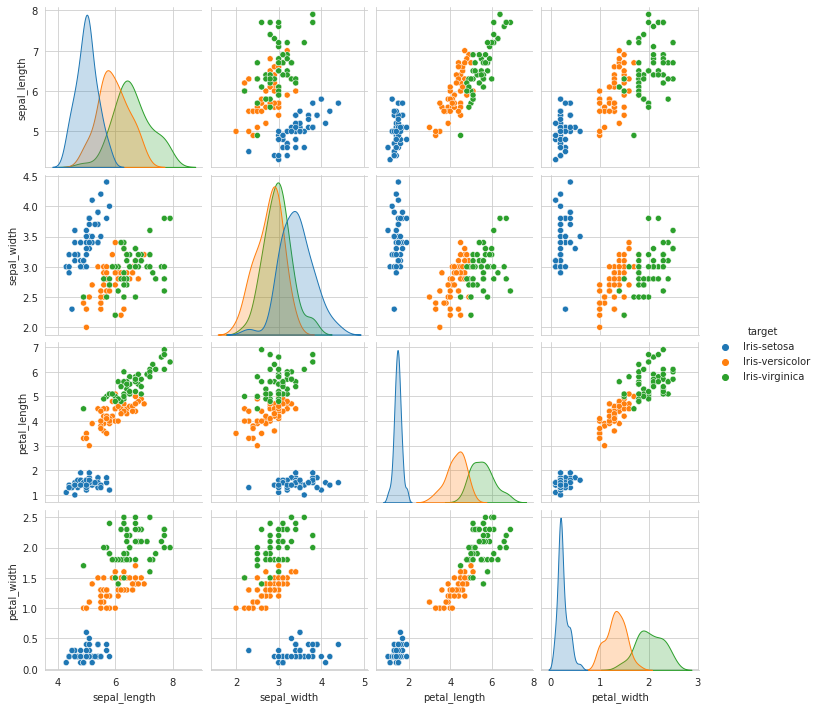

In [40]:
# Plot the data using seaborn's pairplot
sns.pairplot(iris_df, hue= "target")

The Iris data is in a so-called 'wide' format, in which each column corresponds to a variable and each row of the DataFrame corresponds to one observation. Turn it into a 'long' format in which each row is a measurement. 

Specifically, change the data layout of the IRIS dataFrame so that it has 3 columns:
- variable (one of sepal_length, sepal_width, petal_length, petal_width)
- value
- target

If you would like to learn more, [Tidy Data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf) by [Hadley Wickham](http://hadley.nz/) provides a very nice explanation of best practices for data formating.

Hint: look at reshaping functions in http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [41]:
iris_df_long = iris_df.melt(id_vars='target')
print(len(iris_df_long.index))
iris_df_long.head()

600


,target,variable,value
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_length,4.9
2,Iris-setosa,sepal_length,4.7
3,Iris-setosa,sepal_length,4.6
4,Iris-setosa,sepal_length,5.0


Now create a box-plot of values that each variable takes, split by the target species.

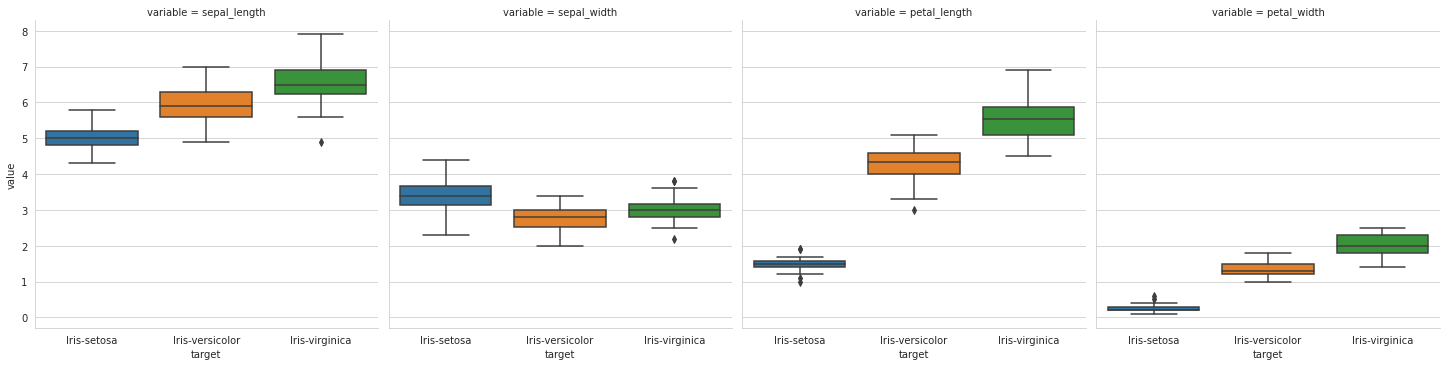

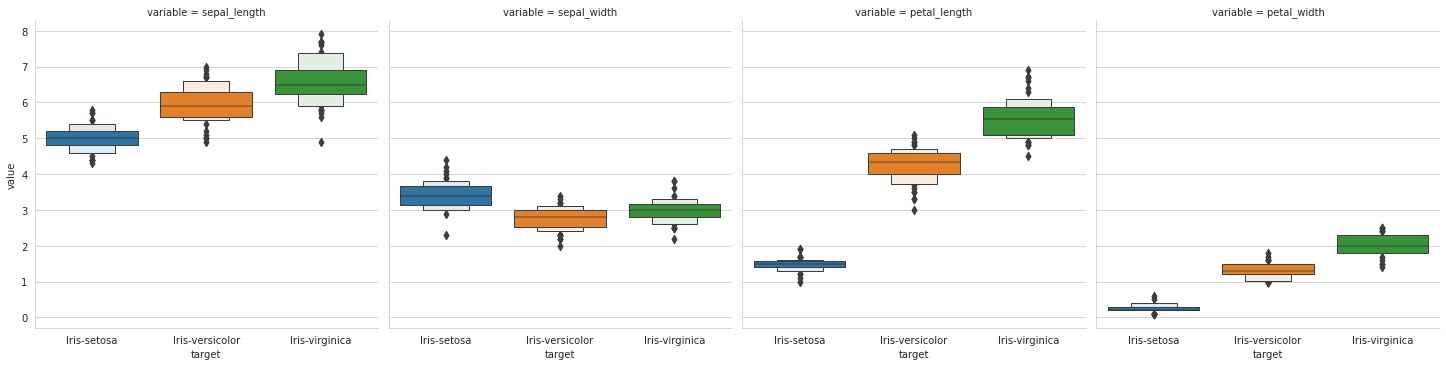

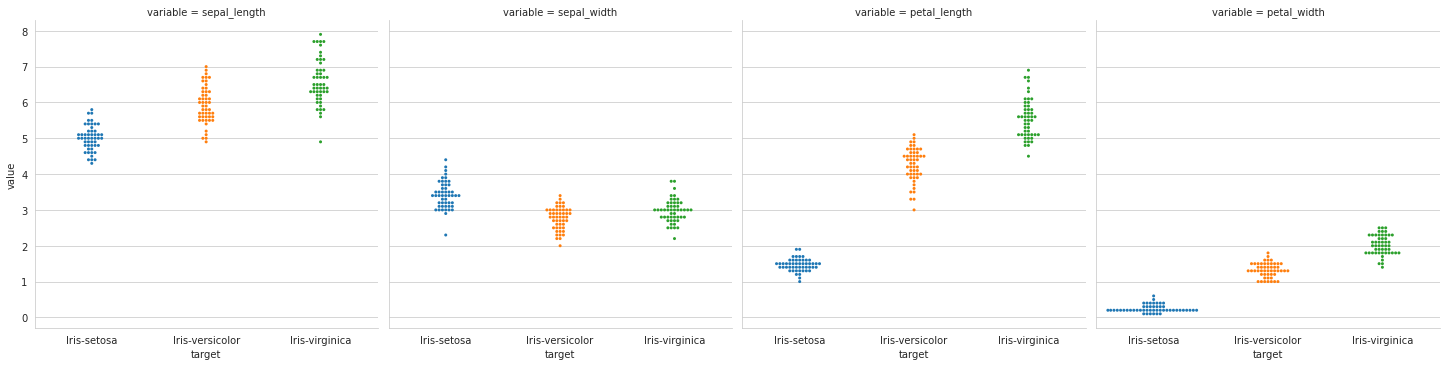

In [42]:
# Hint: use a `catplot`
sns.catplot(x = 'target', y = 'value', col='variable', data=iris_df_long, kind = 'box')

# TODO: create two more plots, using a boxenplot and a swarmplot.

sns.catplot(x = 'target', y = 'value', col='variable', data=iris_df_long, kind = 'boxen')
sns.catplot(x = 'target', y = 'value', col='variable', data=iris_df_long, kind = 'swarm', s=3)

### k-Nearest Neighbors

We will use the loaded Iris data describing iris flowers
and shows relations between their length and petal width for three
species (namely: setosa, versicolor, virginica).

For this exercise we will restrict our analysis to just two variables: **petal length** and **petal width**.

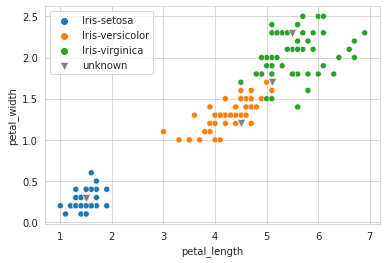

In [43]:
unknown_df = pd.DataFrame(
    [[1.5, 0.3, 'unknown'],
     [4.5, 1.2, 'unknown'],
     [5.1, 1.7, 'unknown'],
     [5.5, 2.3, 'unknown']],
     columns=['petal_length', 'petal_width', 'target'])

sns.scatterplot(x='petal_length', y='petal_width', hue='target', data=iris_df)
sns.scatterplot(x='petal_length', y='petal_width', color='gray', marker='v',
                label='unknown', s=70, data=unknown_df)

Based on these two features, it is easy to distinguish iris setosa from the two remaining species. Yet iris versicolor and virginica remain mixed together. 

Looking closely at the plot, we might estimate the species of the selected unknown irises (gray triangles). For three of them the answer seems obvious – they belong in uniformly-colored areas covered by one species only. Yet unknown iris flower in (5.1, 1.7) is troublesome – it lays on the boundary of versicolor and virginica clusters. We can assume, that its species is the one of the closest one to it, coming from the training set (and so having a label). 

K-Nearest Neighbors method (http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) solves the classification problem, i.e. sets class labels (species in case of irises) of a previously unseen sample by choosing the most common class among the top k neighbors of the sample in question (for instance according to the Euclidean distance). Thus, the k-Nearest Neighbors algorithm works as follows. For each unlabeled sample x:
1. Find k nearest neighbors among the labeled samples.
2. Set the most common label among them as label of x.

#### Problem 3 [3p]

##### Implement the k-Nearest Neighbors algorithm [1p].

Take advantage of matrix calculus rather than using for loops.

**Tip:** What is computed by \begin{equation} \sqrt{(X - Y)^T (X - Y)} \end{equation} when both X and Y are vectors?

**Tip:** Try to use broadcasting (NumPy: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and built-ins sort, numpy.sort, numpy.argsort (sorting), scipy.stats.mode (choosing the most common element of the set).

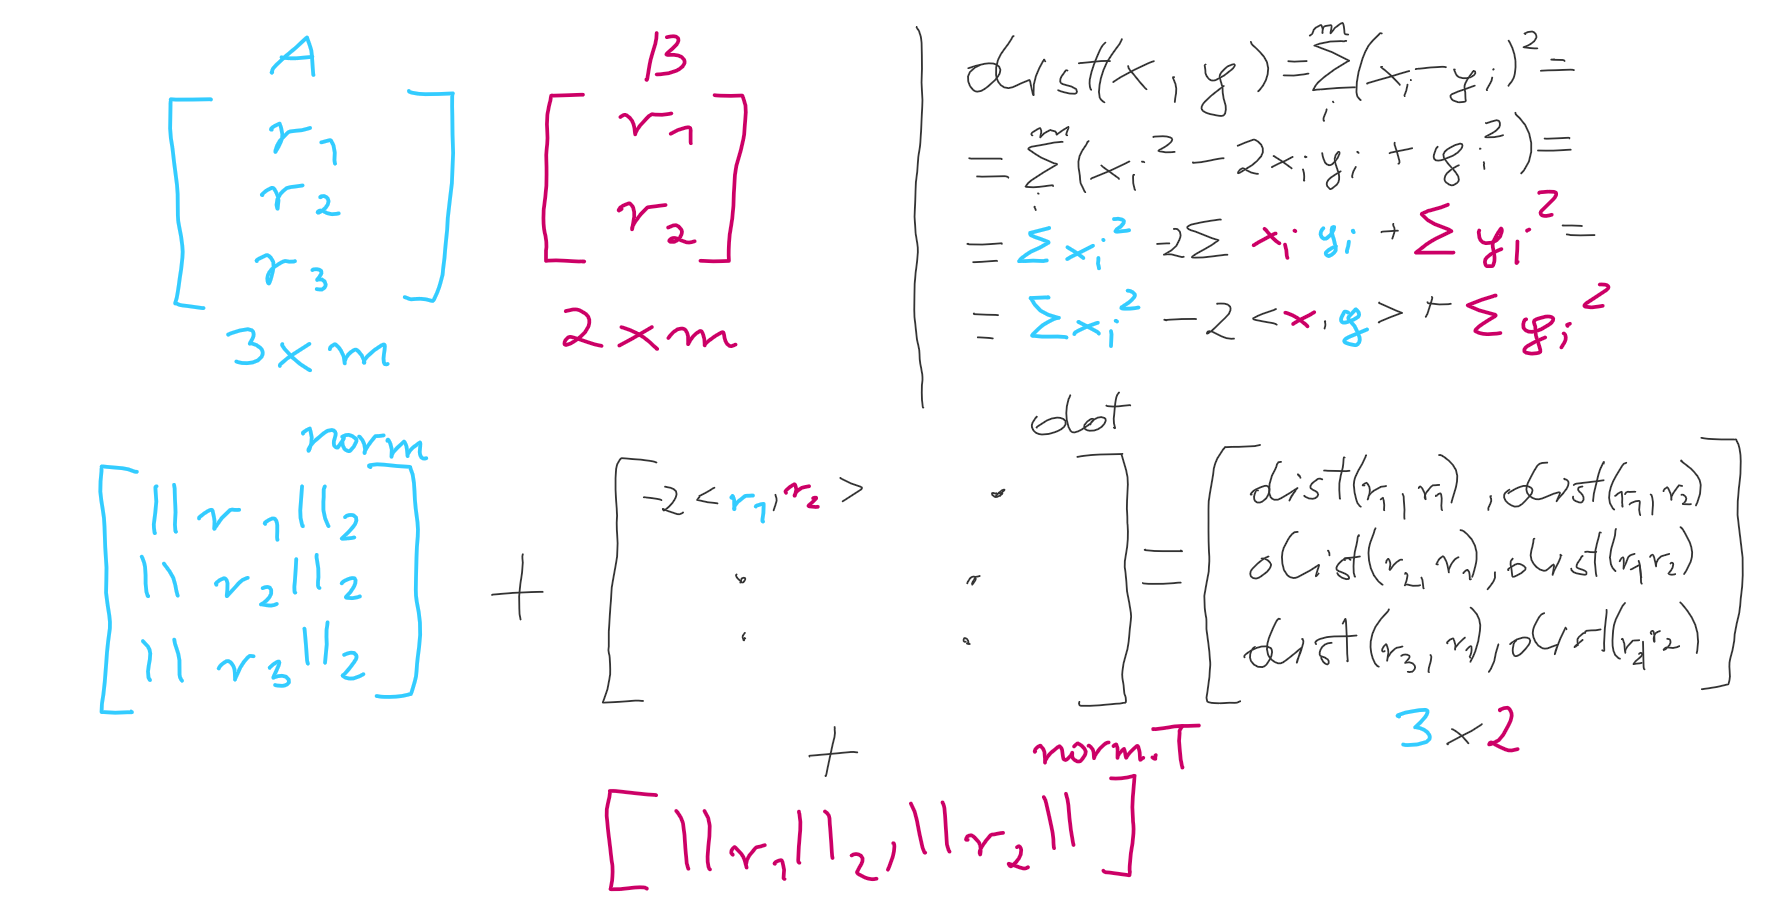

In [44]:
import numba as nb

def euclidean_distance_square_einsum(x1, x2):
    return np.einsum('ij,ij->i', x1, x1).reshape(x1.shape[0], 1) + np.einsum('ij,ij->i', x2, x2) - 2*np.dot(x1, x2.T)

def euclidean_distance_square_purenp(x1, x2):
    return np.sum(x1*x1, 1).reshape(x1.shape[0], 1) + np.sum(x2*x2, 1) - 2*np.dot(x1, x2.T)

In [45]:
def KNN(train_X, train_Y, test_X, ks, verbose=False, var = 'einsum'):
    """
    Compute predictions for various k
    Args:
        train_X: array of shape Ntrain x D
        train_Y: array of shape Ntrain
        test_X: array of shape Ntest x D
        ks: list of integers
    Returns:
        preds: dict k: predictions for k
    """
    # Cats data to float32
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)

    # Alloc space for results
    preds = {}

    if verbose:
        print("Computing distances... ", end='')
    
    # TODO: fill in an efficient distance matrix computation
    if var == 'einsum':
        dists = euclidean_distance_square_einsum(train_X, test_X)
    elif var == 'pnumpy':
        dists = euclidean_distance_square_purenp(train_X, test_X)
    
    if verbose:
        print("Sorting... ", end='')
    
    # TODO: findes closest trainig points
    # Hint: use argsort
    closest = np.argsort(dists, axis = 0)

    if verbose:
        print("Computing predictions...", end='')
    
    
    targets = train_Y[closest]

    for k in ks:
        predictions, _ = sstats.mode(targets[:k])
        predictions = predictions.ravel()
        preds[k] = predictions
    if verbose:
        print("Done")
    return preds

In [46]:
# Now classify the 4 unknown points
iris_x = np.array(iris_df[['petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

unknown_x = np.array(unknown_df[['petal_length', 'petal_width']])

KNN(iris_x, iris_y, unknown_x, [1, 3, 5, 7], False, 'pnumpy' )

{1: array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
        'Iris-virginica'], dtype=object),
 3: array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica'], dtype=object),
 5: array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
        'Iris-virginica'], dtype=object),
 7: array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
        'Iris-virginica'], dtype=object)}

##### Plot the Decision boundary [1p]


Use meshgrid to generate the points in the space spanned by data.
Then map the classes to numbers 0, 1, 2 and make a contour plot with the
decision boundary.

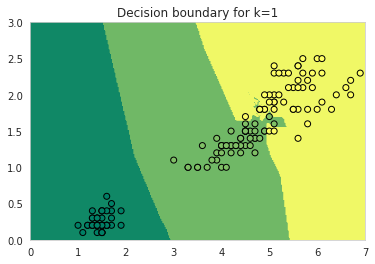

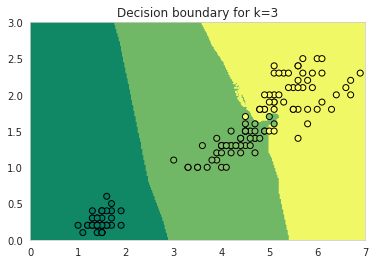

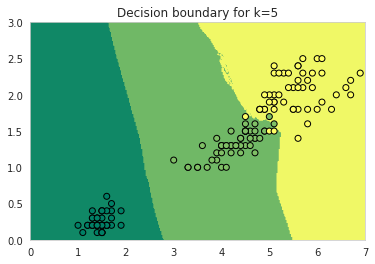

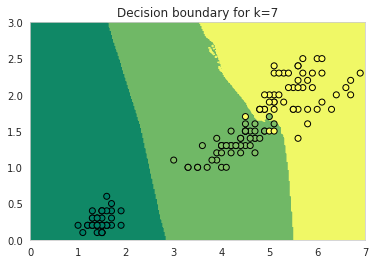

In [47]:
iris_x = np.array(iris_df[['petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

X_ls = np.linspace(0,7,300)
Y_ls = np.linspace(0,3,300)

mesh_x, mesh_y = np.meshgrid(X_ls, Y_ls)

#use np.unique with suitable options to map the class names to numbers
target_names, iris_y_ids = np.unique(iris_y, return_inverse=True)

mesh_data = np.hstack([mesh_x.reshape(-1, 1), mesh_y.reshape(-1, 1)])

preds = KNN(iris_x, iris_y_ids, mesh_data, [1, 3, 5, 7])

for k, preds_k in preds.items():
    plt.figure()
    plt.title(f"Decision boundary for k={k}")
    plt.contourf(mesh_x, mesh_y, preds_k.reshape(300, 300), cmap = 'summer' )
    plt.scatter(iris_x[:,0], iris_x[:,1], c=iris_y_ids, cmap = 'summer', marker = 'o', edgecolors='black', linewidth=1)

##### Estimate performance for various ks [1p]
Consider the following experiment (bootsrap error estimation):
1. We sample **with replacement** a dataset equal in size to the amount of data we have (i.e. for Iris, we pick 150 examples). This forms a trainign set. Since we have sampled with replacement, some samples were picked multiple times, and some were left out. Form a test set from the remaining ones.
2. Based on the training set, we use the k-NN algorithm to predict the labels on the test set.
3. We then check the number of errors and write it down.

Do this 500 times for k ∈ {1, 3, 5, ..., 19}. Plot a function of the average number of errors as the function of k. It should be similar to one of the plots below.

In [48]:
#TODO: write a function to compute error rates
def err_rates(preds, test_Y):
    ret = {}
    for k, preds_k in  preds.items():
        # TODO: fill in error count computation
        ret[k] = np.mean(preds_k!=test_Y)
    return ret

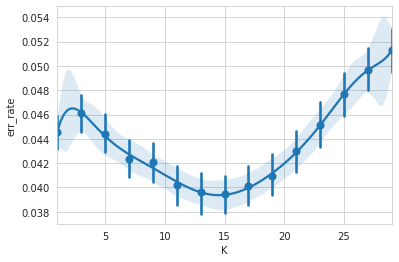

In [49]:
iris_x = np.array(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

ks = range(1, 30, 2)
results = []

for _rep in tqdm(range(1000)):
    #TODO
    # Use np.random.randint to get training indices
    # Then find all unselected indices to form a test set 
    all_idx = np.arange(0,150)
    train_idx = np.random.randint(low = 0, high = 150, size = 150)
    test_idx = all_idx[~ np.isin(all_idx, train_idx)]

    train_X = iris_x[train_idx] 
    train_y = iris_y[train_idx]
    test_X = iris_x[test_idx] 
    test_y = iris_y[test_idx]

    #TODO: apply your kNN classifier to data subset
    preds = KNN(train_X, train_y, test_X, ks, verbose=False)
    errs = err_rates(preds, test_y)
    
    for k, errs_k in errs.items():
        results.append({'K':k, 'err_rate': errs_k})

# results_df will be a data_frame in long format
results_df = pd.DataFrame(results)

sns.regplot(x='K', y='err_rate', data=results_df, x_estimator=np.mean, order = 10)

#### Problem 4 [2p]

Implement the k-NN algorithm with a leave-one-out error estimation (Note: it can be done very efficiently).

Then perform two experiments:
1. plot the leave-one-out error rate as a function of $K$
2. choose K=15, plot the leave-one-out error rate as a function of training dataset size. For best results, repeat the experiment 100 times with different permutations of the dataset.

In [50]:
def KNN_LOO(train_X, train_Y, test_X, ks, verbose=False, num_stable = True):
    """
    Compute predictions for various k
    Args:
        train_X: array of shape Ntrain x D
        train_Y: array of shape Ntrain
        test_X: array of shape Ntest x D
        ks: list of integers
    Returns:
        preds: dict k: predictions for k
    """
    # Cats data to float32
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)

    # Alloc space for results
    preds = {}

    if verbose:
        print("Computing distances... ", end='')
    #
    # TODO: fill in an efficient distance matrix computation
    if num_stable == True:
        dists = euclidean_distance_square_einsum(train_X, test_X)
    else:
        dists = euclidean_distance_square_purenp(train_X, test_X)

    if verbose:
        print("Sorting... ", end='')
    
    # TODO: findes closest trainig points
    # Hint: use argsort
    closest = np.argsort(dists, axis = 0)

    if verbose:
        print("Computing predictions...", end='')
    
    targets = train_Y[closest]

    for k in ks:
        predictions, _ = sstats.mode(targets[1:k+1,:])
        predictions = predictions.ravel()
        preds[k] = predictions
    if verbose:
        print("Done")
    return preds

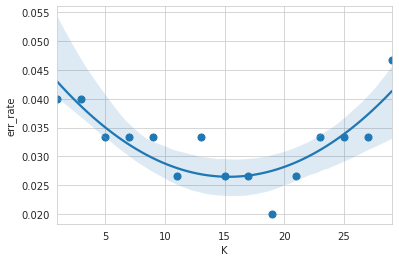

In [51]:
iris_x = np.array(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

ks = range(1, 30, 2)

def test_K(train_X, train_y, ks):

    preds = KNN_LOO(train_X, train_y, train_X, ks, False, True)
    errors = []

    for k in tqdm(ks):
        error = np.mean(preds[k] != train_y)
        errors.append({'K':k, 'err_rate': (error)})

    return errors

errors = test_K(iris_x, iris_y, ks)
results_df = pd.DataFrame(errors)

sns.regplot(x='K', y='err_rate', data=results_df, x_estimator=np.mean, order = 2)

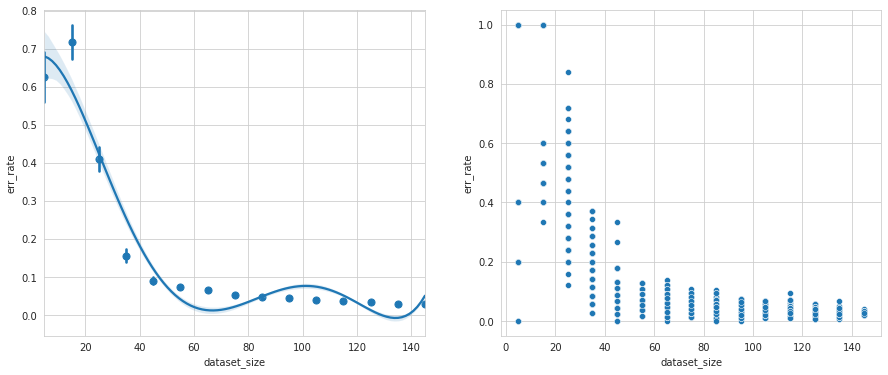

In [52]:
iris_x = np.array(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

dataset_sizes = np.arange(5, 151, 10)

def test_dataset_size(train_X, train_y, k, dataset_sizes, number_of_experiments):

    errors = []
    idx = np.arange(0,150)

    for dataset_size in tqdm(dataset_sizes):

        for experiment in np.arange(number_of_experiments):
            np.random.shuffle(idx)
            ex_train_X = train_X[idx][:dataset_size]
            ex_train_y = train_y[idx][:dataset_size]

            preds = KNN_LOO(ex_train_X, ex_train_y, ex_train_X, k)
            error = np.mean(preds[15]!=ex_train_y)
            errors.append({'dataset_size': dataset_size, 'err_rate': (error)})
    
    return errors  

res = test_dataset_size(iris_x, iris_y, [15], dataset_sizes, 100)
results_df = pd.DataFrame(res)
mean_results_for_dataset_sizes = pd.DataFrame([results_df[results_df['dataset_size'] == dataset_size].mean() for dataset_size in dataset_sizes])


fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.regplot(x='dataset_size', y='err_rate', data=results_df, x_estimator=np.mean, order = 5, ax=ax[0])
sns.scatterplot(x='dataset_size', y='err_rate', data=results_df, ax=ax[1])
fig.show()

In [53]:
mean_results_for_dataset_sizes.sort_values('err_rate')

,dataset_size,err_rate
14,145.0,0.027793
13,135.0,0.028963
12,125.0,0.033600
11,115.0,0.036870
10,105.0,0.039333
9,95.0,0.044316
8,85.0,0.046824
7,75.0,0.052800
6,65.0,0.064462
5,55.0,0.073273


#### Problem 5 [2p] 

Apply the K-Nearest Neighbors (K-NN) algorithm to the MNIST dataset. 

The MNIST (http://yann.lecun.com/exdb/mnist/) dataset consists of normalized (centered and stretched) scans of hand-written digits. Specifically, each element of the dataset is a 28 × 28 grayscale image, thus having 764 8-bit pixels. 

1. Display a few objects from each of the classes, paying attention to aesthetics and clarity of your presentation. **Note:** You already downloaded the dataset in "Setup" section. Please use the code below to get started.

2. **[2p]** Apply a k-NN classifier to the MNIST dataset. First, divide the training set into two parts, which we will call training and validation. On MNIST use the first 50000 samples for training and the last 10000 for validation. Then find the optimal number of neighbors by assessing the accuracy on the validation set. You do not need to repeat this experiment multiple times. Finally, compute the accuracy on the test set obtained with the best previously chosen number of neighbors. On MNIST you should get about 3% errors. Pick a few mislabeled samples from the test dataset and plot them along with the correct ones. **Note:**
  * MNIST is much larger than the Iris dataset. A good implementation may need a few minutes depending on your runtime type. Please optimize your algorithm:
  * Compute the distances only once, then test for different values of k.
  * Use vectorized expressions to compute the distance. It is possible to compute all distances between the training and testing points in one expression. Hint: think about the vectorized expression \begin{equation}(X - Y)^T (X - Y)\end{equation}
  * You can use single precision numbers in computation.
  * If your code is taking a long time to execute, please save its results before the lab session.

**Note:** in NumPy, matrices have its own data type (dtype), which is retained during
calculations. Please pay attention to it. I particular, do not subtract values of data types not
having the sign bit, do not divide integers, etc. Results of such operations will not be
automatically casted to types having the required precision.

In [54]:
with np.load('mnist.npz') as data:
    mnist_full_train_data_uint8 = data['train_data']
    mnist_full_train_labels_int64 = data['train_labels']
    mnist_test_data_uint8 = data['test_data']
    mnist_test_labels_int64 = data['test_labels']
        
# Split train data into train and validation sets
mnist_train_data_uint8 = mnist_full_train_data_uint8[:50000]
mnist_train_labels_int64 = mnist_full_train_labels_int64[:50000]
mnist_valid_data_uint8 = mnist_full_train_data_uint8[50000:]
mnist_valid_labels_int64 = mnist_full_train_labels_int64[50000:]

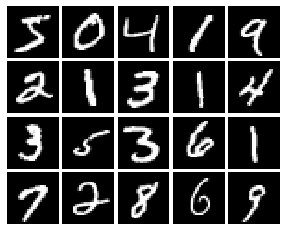

In [55]:
plot_mat(mnist_train_data_uint8[:20, None], cmap='gray')

In [56]:
# MNIST is large.
# Implement a batched KNN classifier, which processes the test data in small batches
# and returns the error rates

# The code should not run for more than a couple of minutes on the Colab runtime, 
# If it is slower, optimize the distance computation in KNN

def batched_KNN(train_X, train_Y, test_X, ks, verbose=False, batch_size=200):
    
    all_preds = {k: [] for k in ks}

    for i in tqdm(range(0, test_X.shape[0], batch_size)):
        batch_test_X = test_X[i:i + batch_size]

        preds = KNN(train_X, train_Y, batch_test_X , ks)

        # TODO: run KNN on the batch and save the predictions
        for k in all_preds.keys():
            all_preds[k] = np.concatenate((all_preds[k], preds[k]))
    return all_preds

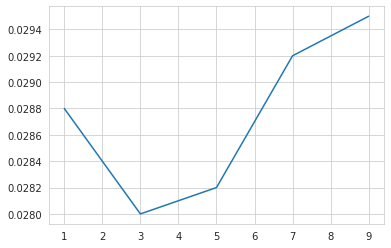

In [57]:
# Now find the best k on the validation set
ks = [1, 3, 5, 7, 9]
mnist_validation_preds = batched_KNN(
    mnist_train_data_uint8.astype('float32').reshape(-1, 28*28), mnist_train_labels_int64,
    mnist_valid_data_uint8.astype('float32').reshape(-1, 28*28),
    ks)

mnist_validation_errs = err_rates(mnist_validation_preds, mnist_valid_labels_int64)
plt.plot(ks, [mnist_validation_errs[k] for k in ks])

In [58]:
# Now use the best k to compute the test error

best_K, val_error = min(mnist_validation_errs.items(), key=lambda x: x[1]) 

mnist_test_preds = batched_KNN(
    mnist_full_train_data_uint8.astype('float32').reshape(-1, 28*28), 
    mnist_full_train_labels_int64,
    mnist_test_data_uint8.astype('float32').reshape(-1, 28*28), 
    [best_K])

mnist_test_errs = err_rates(mnist_test_preds, mnist_test_labels_int64)
print(f"\n\nWhen k={best_K} the test error rate is {mnist_test_errs[best_K] * 100.0:.1f}%%")




When k=3 the test error rate is 2.9%%


In [ ]:
def misslabeled_numbers(mnist_test_preds, mnist_test_labels, sample_size, best_K):

    missl = []
    iterator = 0

    while len(missl) < sample_size:

        if mnist_test_preds[best_K][iterator]!=mnist_test_labels[iterator]:

            missl.append([mnist_test_preds[best_K][iterator], iterator])

        iterator += 1
    
    return np.array(missl, dtype=np.int32)

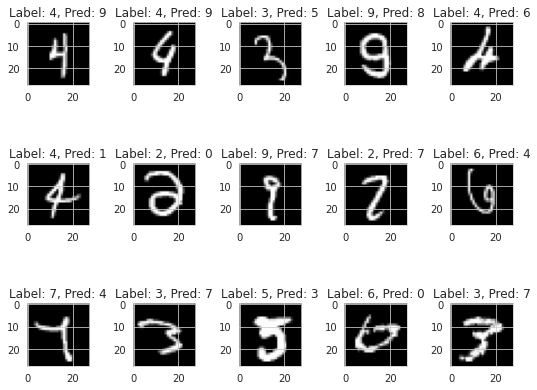

In [ ]:
num_row = 3
num_col = 5
res = misslabeled_numbers(mnist_test_preds, mnist_test_labels_int64, num_row*num_col, best_K)
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(mnist_test_data_uint8[res[i, 1]] , cmap='gray')
    ax.set_title('Label: {}, Pred: {}'.format(mnist_test_labels_int64[res[i,1]], res[i,0]))
plt.tight_layout()
plt.show()

### Locality sensitive hashing

Problem 4 was about speeding up the inference using loops implicitly present in matrix multiplication instead of explicit loops in Python. In this problem, we will explore a strategy to truly reduce the total number of computations required to find nearest neighbors without sacrificing too much accuracy.

To speed up nearest neighbor search we will employ *Locality Sensitive Hashing (LSH)* functions. For a given distance metric, the locality sensitive hash should put items that are similar into the same bucket. Notice that this is essentially a design choice opposite to traditional cryptographic hash functions that should amplify the difference of similar inputs (typically we want that small perturbations of data result in large changes to the hash value).

One of the simplest implementations of LSH approximates the cosine distance. Let $x\in \mathbb{R}^N$ and $y\in \mathbb{R}^N$ be two vectors. Their cosine distance is defined as:

\begin{equation}
    d_\text{cos}(x,y) = \frac{x \cdot y}{\|x\| \|y\|} = \cos\left(\theta(x,y)\right),
\end{equation}
where $\theta(x,y)$ is the unsigned angle between $x$ and $y$.

We will construct a family $H$ of hash functions that are an LSH for angle distances (an approximation to cosine distance). Assume $p\in \mathbb{R}^N$ is a random vector (components are sampled from the normal distribution) of length 1. Then define the hash function $h(x) = \text{sgn}(x\cdot p)$, where $\text{sgn()}$ is the sign function. It can be proven that:

\begin{equation}
    p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}.
\end{equation}

The equation means that the probability of a hash collision grows as the the angle between two vectors gets smaller. Therefore, vectors that are close according to the cosine distance will be put with high probability into the same bin (we use the fact that for small $\theta$ we can approximate $\cos(\theta) = 1 - \theta/\pi$.

We will say that a family of randomly chosen hash functions $H$ is $(d_1, d_2, p_1, p_2)$-sensitive with respect to a distance metric $d$ if for any $x$ and $y$:
1. If $d(x,y) \leq d_1$ then $p_{h\in H}[h(x)=h(y)] \geq p_1$.
2. If $d(x,y) \geq d_2$ then $p_{h\in H}[h(x)=h(y)] \leq p_2$.

For example, our family of randomly chosen hyperplanes is $(d_1, d_2, (1-d_1)/\pi, (1-d_2)/\pi)$-sensitive.

Ideally, vectors should be placed into the same bin with a high probability if their distance is smaller than a threshold, and with a low probability if their distance is larger that the threshold. By combining hashing functions we can get closer to this ideal sensitivity.

Given a family of hash functions $H$ with sensitivity $(d_1, d_2, p_1, p_2)$ we can construct a new family $H'$ by combining $r$ functions from $H$:
1. AND: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\forall_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, (p_1)^r, (p_2)^r)$-sensitive.
2. OR: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\exists_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, 1-(1-p_1)^r, 1-(1-p_2)^r)$-sensitive.

AND makes all probabilities shrink, but properly choosing $r$ we can make the lower probability approach 0 while the higher does not. Conversely, OR makes all probabilities grow, we can make the upper probability approach 1 while the lower does not.

#### Problem 6 [1-3p bonus] 

1. **[1bp for exercises list]** **Note:** you can show sketches of proofs for this assignment.
    1. Show that angle between vectors is a metric (https://en.wikipedia.org/wiki/Metric_(mathematics)).
    
    2. Show that $p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}$ for $h$ computed using a randomly chosen hyperplane.

    3. Show the properties of either AND or OR boosting of LSH.

  Please show the solution to this problem dirung the Session for Homework 1, the bonus point will also be added to the points from Homework 1.

3. **[1-3bp]** Reimplement k-Nearest Neighbors for MNIST classification using the cosine distance instead of the Euclidean distance. Choose a sensible value of $k$. Use Locality Sensitive Hashing to achieve an error rate no greater than $150\%$ of the original error rate with at least a $90\%$ speedup (i.e., by considering on average at most 5000 training samples per query image). For a few settings plot the speedup-vs-accuracy relation.

  **Note:** points will be awarded based on ingenuity of your solution. Feel free to explore your own ideas!
